Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [8]:
df=pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
df.drop_duplicates(inplace=True) # Remove Duplicates

In [21]:
df.columns[df.isna().any()] #checking for missing data

Index(['director', 'cast', 'country', 'date_added', 'rating', 'duration'], dtype='object')

In [31]:
df.fillna({"director":"Unknown", "cast":"Unknown", "country":"Unknown", "date_added":"Unknown", "rating":"Unknown", "duration":"Unknown"},inplace=True)

Exploratory Data Analysis (EDA)

1. Distribution of Content Type
(Movies vs. TV shows)

C:\Users\Akriti\AppData\Local\Temp\ipykernel_6832\1097418222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type',data=df,palette='pastel')


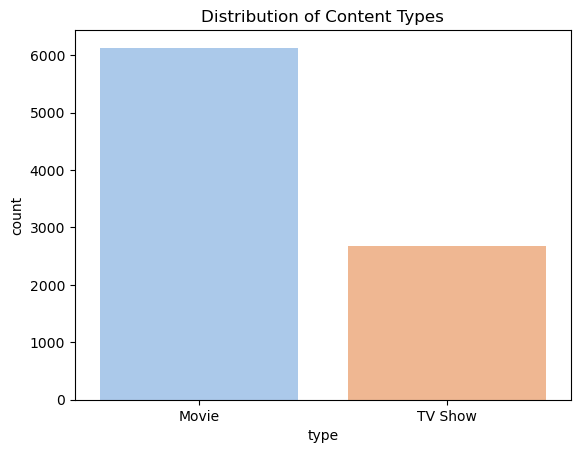

In [37]:
sns.countplot(x='type',data=df,palette='pastel')
plt.title("Distribution of Content Types")
plt.show()

2.Trend of Netflix Content Over the Years

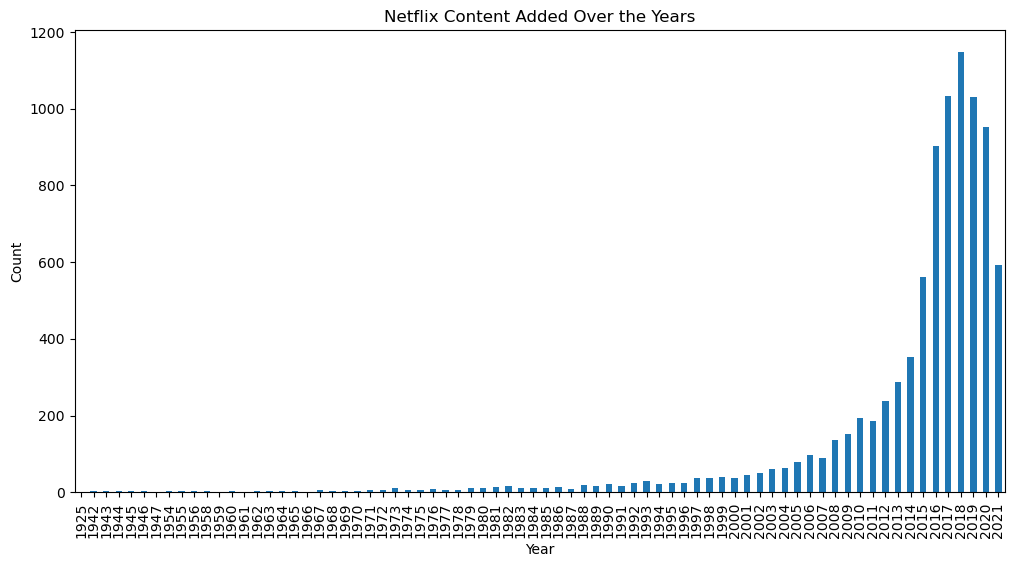

In [82]:
df['release_year'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.title("Netflix Content Added Over the Years")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Most Common Genres

In [70]:
from collections import Counter
genres=",".join(df['listed_in']).split(",")
genres_count=Counter(genres)

In [72]:
genre_df=pd.DataFrame(genres_count.items(),
columns=["Genre","Count"]).sort_values(by="Count",ascending=False)

C:\Users\Akriti\AppData\Local\Temp\ipykernel_6832\1942621160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_df["Genre"],


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

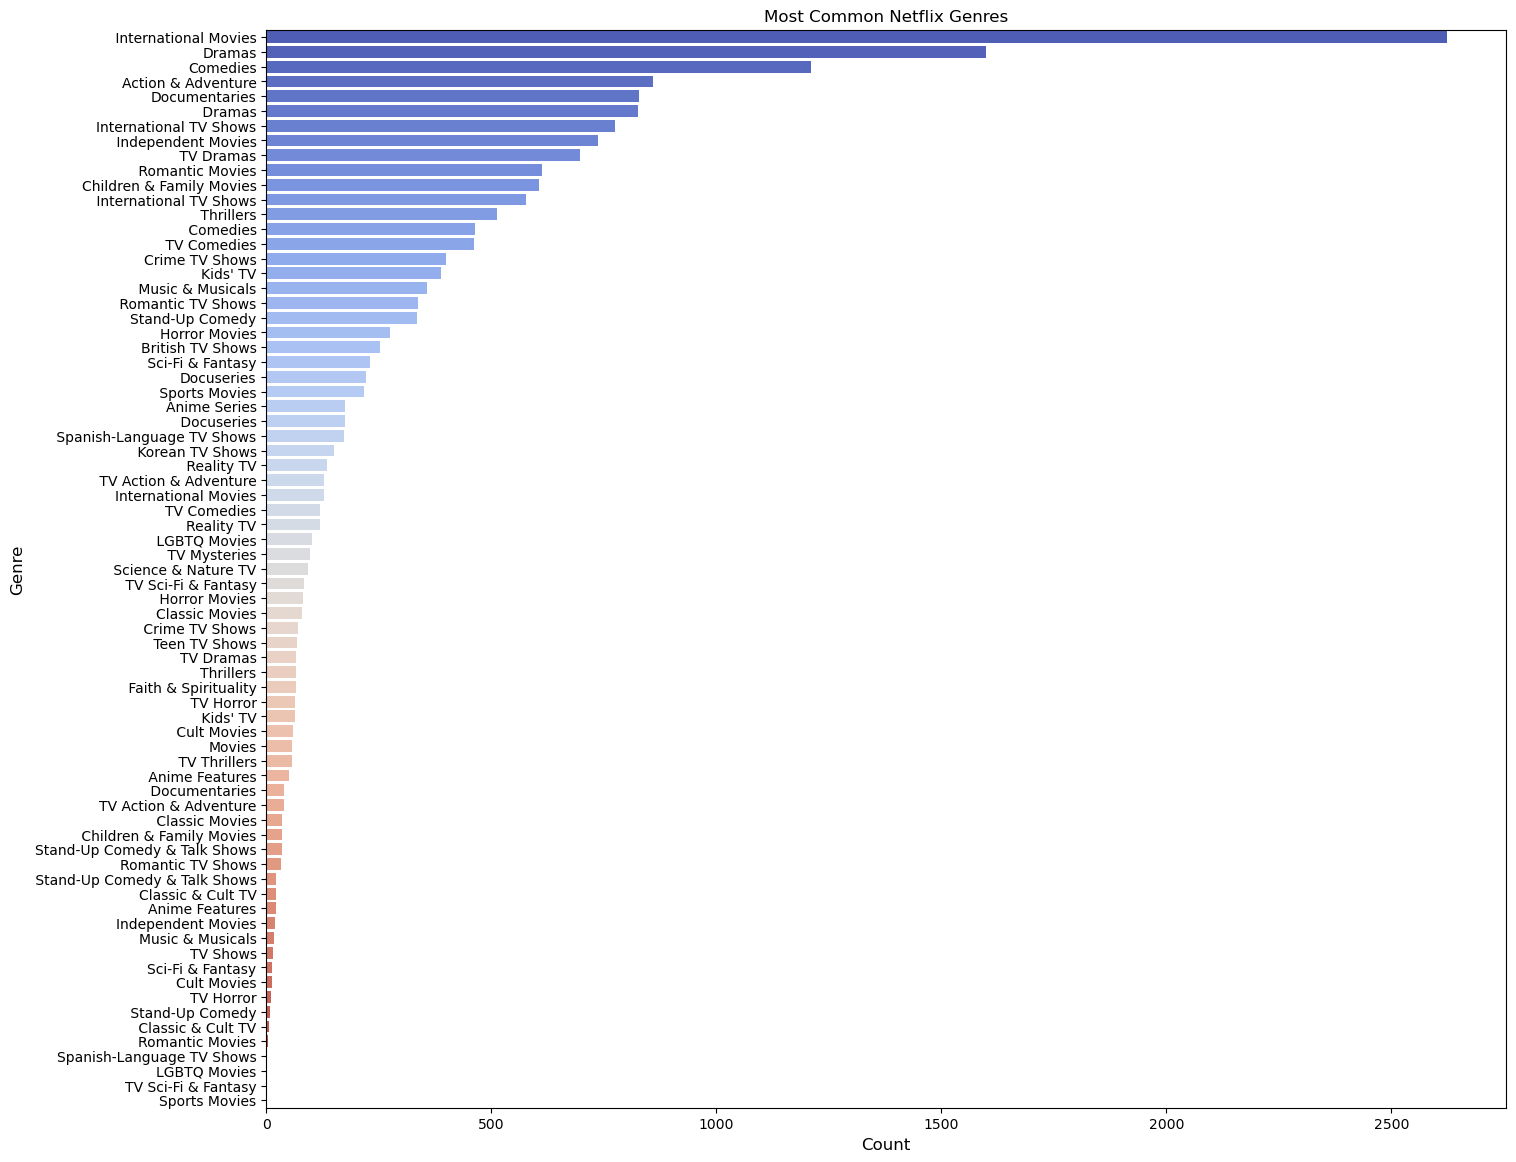

In [80]:
plt.figure(figsize=(16,14))
sns.barplot(y=genre_df["Genre"],
x=genre_df["Count"],palette="coolwarm")
plt.title("Most Common Netflix Genres",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Genre",fontsize=12)
plt.yticks(fontsize=10,rotation=0)
plt.xticks(rotation=0)

Key Insights & Observations :

1.Netflix has more movies than TV.\
2.Content peaked around 2019.\
3.Drama and Comedy are the most common genres.